<a href="https://colab.research.google.com/github/akash02ita/CPSC-599.6-DL-for-Vision/blob/proj/proj/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone --branch proj https://github.com/akash02ita/CPSC-599.6-DL-for-Vision.git myrepo
!cp myrepo/proj/CustomDataset.ipynb .

fatal: destination path 'myrepo' already exists and is not an empty directory.


In [2]:
__BACKUP__NAME__ = __name__
__name__ = "NOT MAIN" # import jupyter methods without running test scripts
%run CustomDataset.ipynb
__name__ = __BACKUP__NAME__

# Setup Custom Dataset

In [3]:
from google.colab import drive
import shutil, zipfile

if __name__ == "__main__":
  # Mount the folder
  drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Setup handwritten text database

In [4]:
DATASET_PATH = "/content/drive/MyDrive/599 Project/custom-dataset-script"

handwritten_zip_path = "/content/drive/MyDrive/599 Project/custom-dataset-script/handwritten-text-images-database.zip"
extract_zip_to(handwritten_zip_path, ".")

'.'

In [5]:
# 'en_test' folder not present.
# train_handwritten = TextDataset("database/en_train_filtered", "database/en_train_filtered/labels.csv")
# val_handwritten = TextDataset("database/en_val", "database/en_val/labels.csv")

# split the texts into training, validation and test (60, 20, 20)
handwritten_textdataset = TextDataset("database/en_train_filtered", "database/en_train_filtered/labels.csv")
print(len(handwritten_textdataset))

19999


## Setup printed text database

In [6]:
"""
!pip install english-words
from english_words import get_english_words_set
!pip install essential_generators
from essential_generators import DocumentGenerator
"""
!pip install nltk
import nltk
nltk.download('words')
from nltk.corpus import words
from random import sample

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [7]:
# https://stackoverflow.com/questions/55200307/generate-a-string-of-n-random-english-words-with-nltk-python
def random_sentence(n):
    return ' '.join(sample(words.words(), n)) # calling it too many times is  inefficient
    # maybe better to use a prexisting word database (althougt not neeeded as sentences.txt has already been generated, and only once is required)

In [8]:
import random, shutil
# GENERATE_SENTENCES = input("Do you want to generate sentences? (y/n) ") == "y"
GENERATE_SENTENCES = False # already generated before. Hardcode to false to be safe
PRINTED_TEXTS_PATH = DATASET_PATH # "/content/drive/MyDrive/599 Project/custom-dataset-script"
class Sentence:
  def __init__(self, tot_sentences=1, min_length=1, max_length=3):
    assert 1 <= min_length <= max_length
    # initialize sentences
    self.tot_sentences = tot_sentences
    self.sentences = [""]*tot_sentences
    for i in range(tot_sentences):
      sentence_length = random.randint(min_length,max_length)
      self.sentences[i] = random_sentence(sentence_length)
  def __len__(self):
    return self.tot_sentences
  def __getitem__(self, i):
    return self.sentences[i]
  def __str__(self):
    return str(self.sentences)

if GENERATE_SENTENCES:
  texts = Sentence(10000)
  # texts = Sentence(100)
  print("total sentences:", len(texts))
  # print(texts)

  # export to file
  with open('sentences.txt', 'w') as file:
    for sentence in texts:
      file.write(sentence+"\n")
  # copy file to drive
  shutil.copy("sentences.txt", PRINTED_TEXTS_PATH)

# copy file from drive
shutil.copy(os.path.join(DATASET_PATH, "sentences.txt"),".")

'./sentences.txt'

In [9]:
with open('sentences.txt', 'r') as file:
  texts = list(map(lambda t: t.rstrip('\n'), file.readlines()))

# split the texts into training, validation and test (60, 20, 20)
from torch.utils.data import random_split

train_size = int(0.6 * len(texts))
val_size = int(0.2 * len(texts))
test_size = len(texts) - train_size - val_size

sentences = texts
print(len(sentences))

10000


In [10]:
# setup one font
extract_zip_to("/content/drive/MyDrive/599 Project/custom-dataset-script/fonts/roboto.zip", "./fonts")
FONT_PATH =  "./fonts/Roboto-Regular.ttf"

# GENERATE_PRINTED_IMAGES = input("Do you want to generate printed images? (y/n) ") == "y"
GENERATE_PRINTED_IMAGES = False # from now and on, to directly extract instead of re-generating

import shutil, os
def zip_to(src, dest):
  # create zip file with the nested folder as the folder `src`
  # so that when extracting `src` folder is extracted instead of `src/*` files
  shutil.make_archive(dest, 'zip', ".", src)


if GENERATE_PRINTED_IMAGES:
  # generate printed images
  generatePrintedImages("printed_text_dataset", FONT_PATH, sentences)

  # zip and save all them on drive
  zip_to("printed_text_dataset", os.path.join(DATASET_PATH, "printed_text_dataset"))  

# extract zip files from drive 
print(os.listdir(DATASET_PATH))
extract_zip_to(os.path.join(DATASET_PATH, "printed_text_dataset.zip"), ".")
print(os.listdir(DATASET_PATH))

['handwritten-text-images-database.zip', 'handwritten-text-images-labels.csv', 'sample images', 'fonts', 'Custom Dataset.ipynb', 'sentences.txt', 'train_text_printed.zip', 'val_text_printed.zip', 'test_text_printed.zip', 'printed_text_dataset.zip', 'covid_ctscan_dataset.zip']
['handwritten-text-images-database.zip', 'handwritten-text-images-labels.csv', 'sample images', 'fonts', 'Custom Dataset.ipynb', 'sentences.txt', 'train_text_printed.zip', 'val_text_printed.zip', 'test_text_printed.zip', 'printed_text_dataset.zip', 'covid_ctscan_dataset.zip']


In [23]:
# split the texts into training, validation and test (60, 20, 20)
printed_textdataset = TextDataset("printed_text_dataset", "printed_text_dataset/labels.csv")
print(len(printed_textdataset))

40000


In [24]:
!ls printed_text_dataset/ | wc -l
print(printed_textdataset[0][1])
printed_textdataset[0][0].show()
print(printed_textdataset[1][1])
printed_textdataset[1][0].show()
print(printed_textdataset[2][1])
printed_textdataset[2][0].show()
print(printed_textdataset[3][1])
printed_textdataset[3][0].show()

40001
muircock


coupure spousy


cauterant lividness


Dasylirion trisula


## Create custom dataset

In [25]:
# get orignal images: https://www.kaggle.com/datasets/plameneduardo/sarscov2-ctscan-dataset?resource=download
extract_zip_to(os.path.join(DATASET_PATH, "covid_ctscan_dataset.zip"),".")
!mv COVID "original_images" || rm -r "original_images"; mv COVID "original_images" 
!rm -r non-COVID
!ls original_images | wc -l

mv: cannot move 'COVID' to 'original_images/COVID': Directory not empty
1252


In [42]:
# in custom dataset assertion error is caused by fact that random_split creates new instance type
dataset = CustomDataset("original_images", printed_textdataset, handwritten_textdataset, labelmode="texttype")
train_size = int(0.6 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])
print(len(dataset))
print(len(train_dataset),len(val_dataset),len(test_dataset), "--", sum([len(train_dataset),len(val_dataset),len(test_dataset)]))

4190
2514 838 838 -- 4190


None


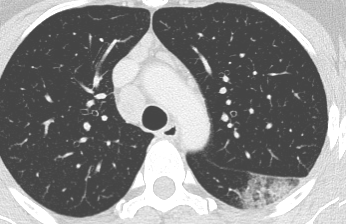

H


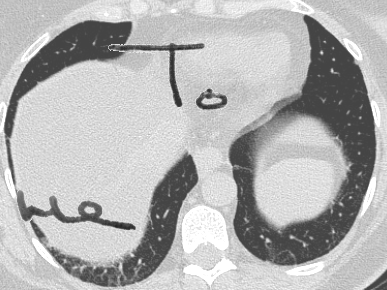

H


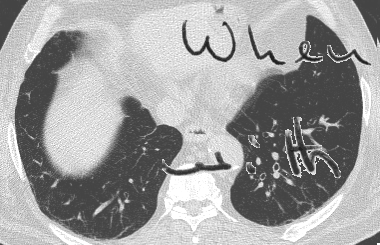

P


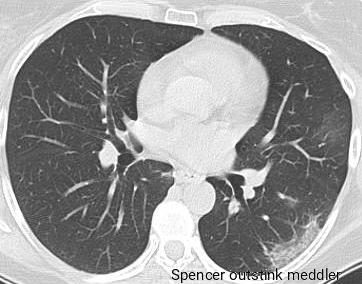

PH


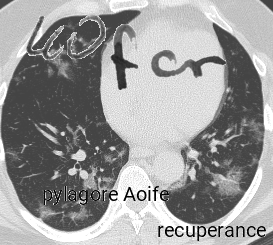

In [50]:
print(dataset[0][1])
dataset[0][0].show()

print(train_dataset[0][1])
train_dataset[0][0].show()

print(val_dataset[0][1])
val_dataset[0][0].show()

print(test_dataset[0][1])
test_dataset[0][0].show()

print(test_dataset[57][1])
test_dataset[57][0].show()

# Model

## model setup

## model training

## model evaluation